In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("rolling_stones_spotify.csv")
df.head()


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [6]:
print(df.shape)
print(df.info())
df.isnull().sum()


(1610, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [7]:
df = df.drop_duplicates()
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df.isnull().sum()


Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

Popularity Distribution

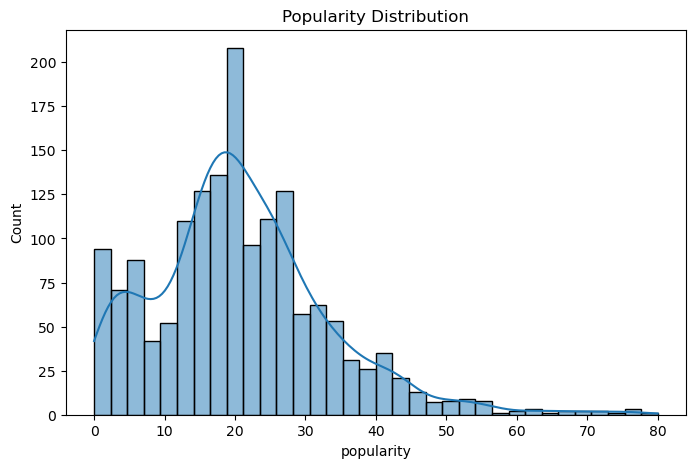

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], kde=True)
plt.title("Popularity Distribution")
plt.show()


Songs per Album

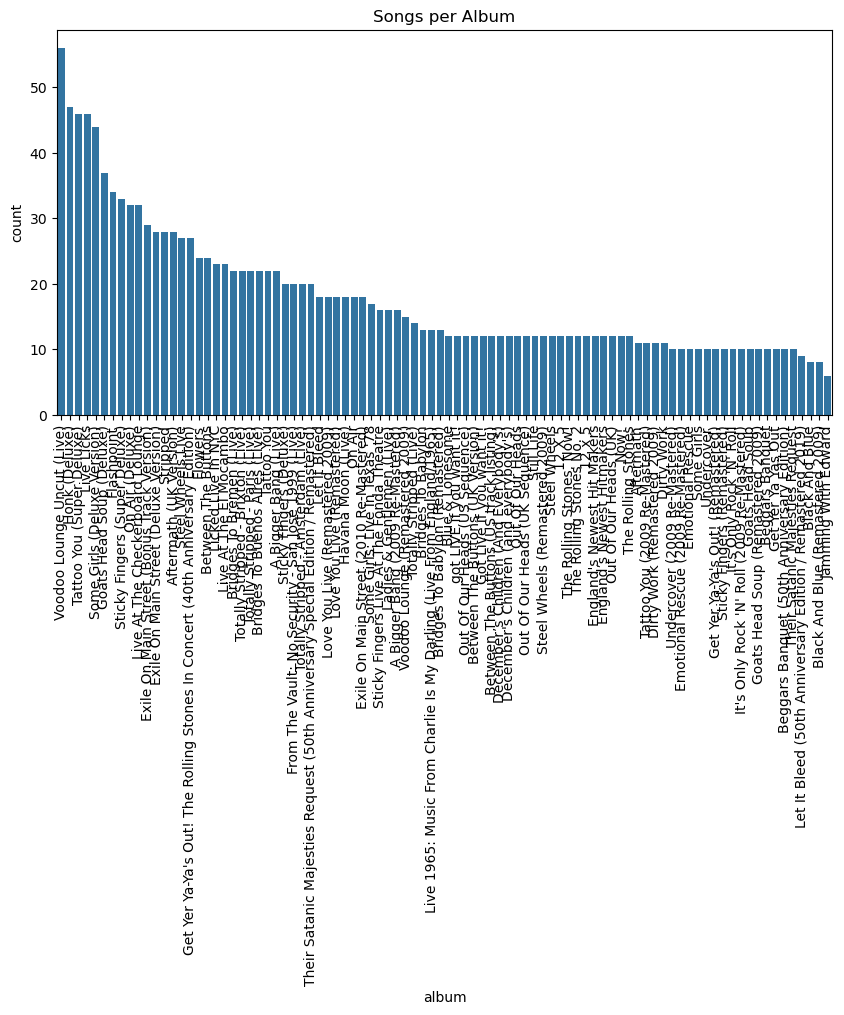

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='album', order=df['album'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Songs per Album")
plt.show()


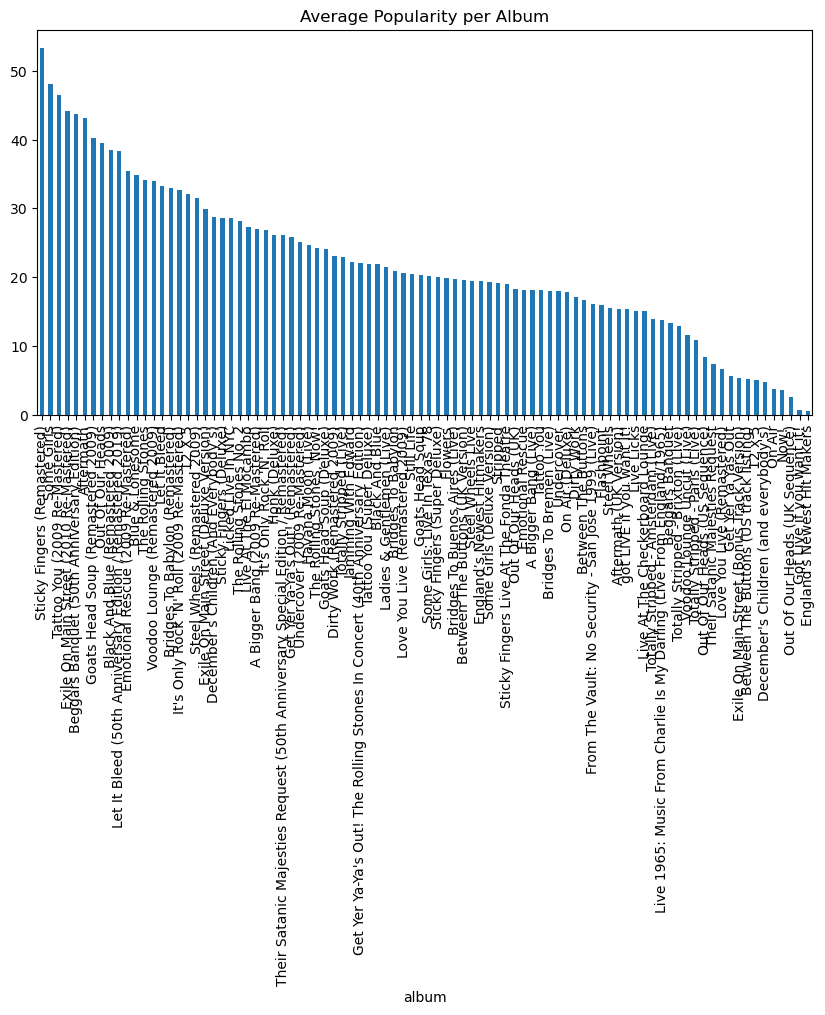

In [10]:
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)
album_popularity.head()

plt.figure(figsize=(10,5))
album_popularity.plot(kind='bar')
plt.title("Average Popularity per Album")
plt.show()


In [11]:
top_2_albums = album_popularity.head(2)
top_2_albums


album
Sticky Fingers (Remastered)    53.3
Some Girls                     48.1
Name: popularity, dtype: float64

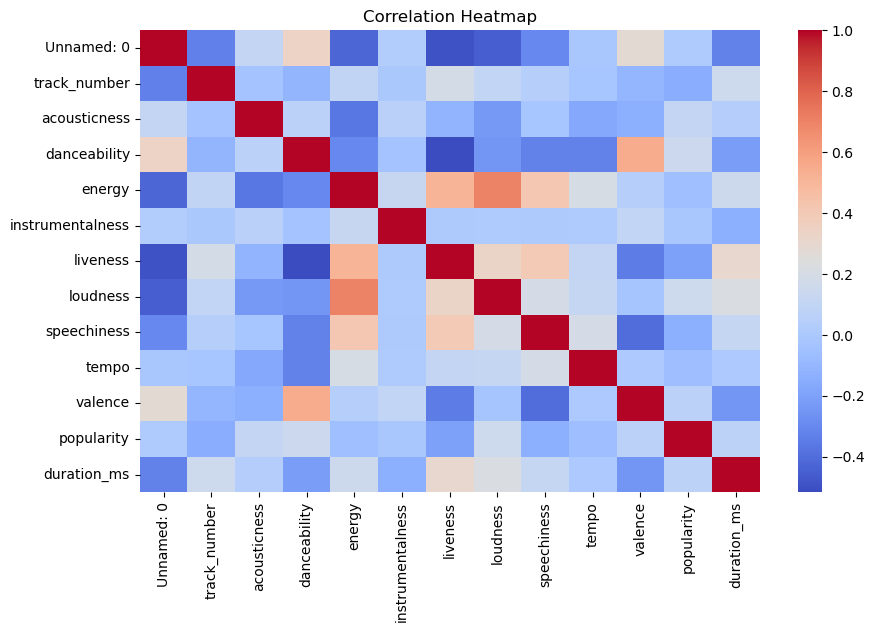

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


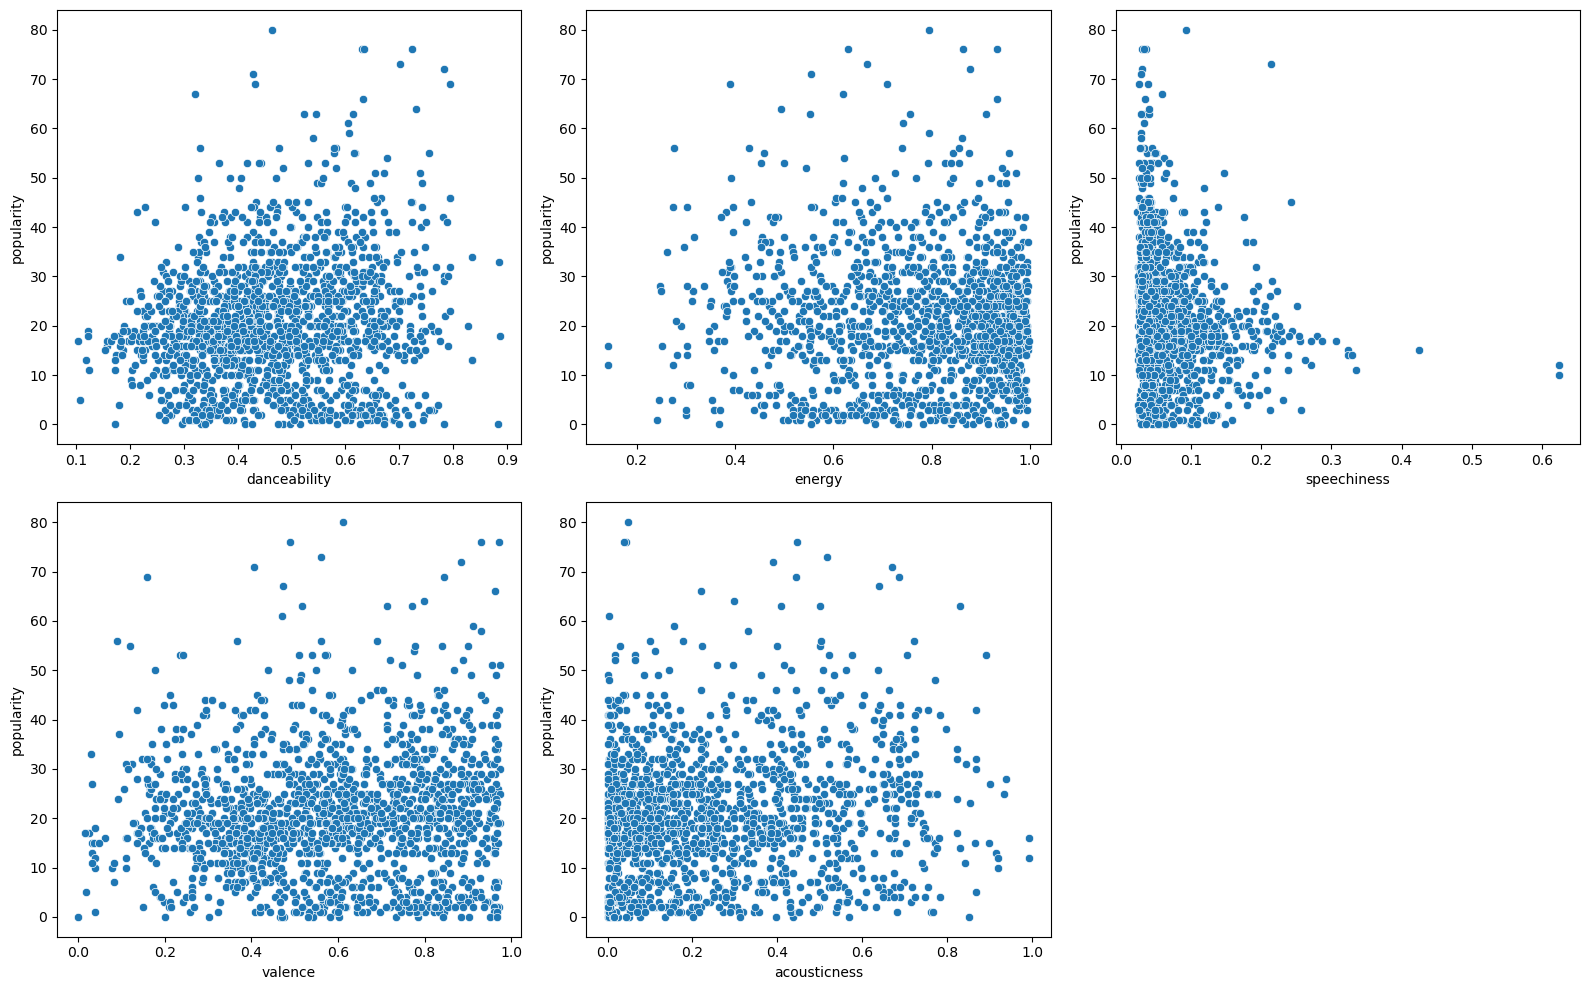

In [13]:
features_to_plot = ['danceability', 'energy', 'speechiness', 'valence', 'acousticness']

plt.figure(figsize=(16,10))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=col, y='popularity')
plt.tight_layout()
plt.show()


In [14]:
features = ['acousticness','danceability','energy','instrumentalness','liveness',
            'loudness','speechiness','tempo','valence','duration_ms','popularity']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


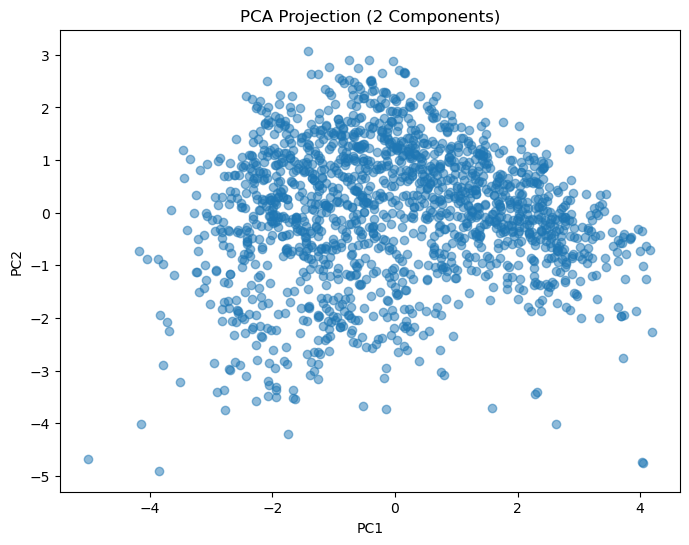

Explained variance: [0.27743591 0.15085471]


In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title("PCA Projection (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance:", pca.explained_variance_ratio_)


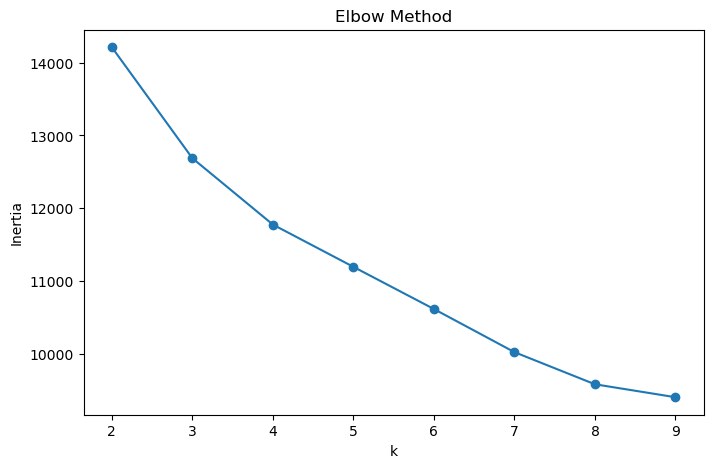

In [16]:
inertia = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()


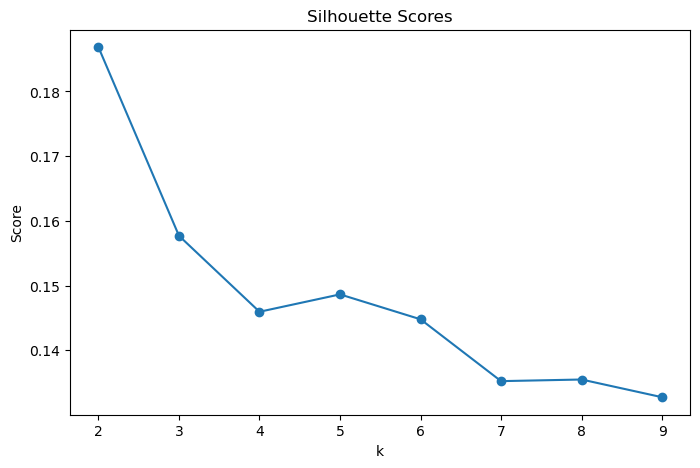

In [17]:
silhouette_scores = []

for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2,10), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()


In [18]:
k = 4  # choose based on elbow + silhouette
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df['cluster'].value_counts()


cluster
0    542
3    421
2    368
1    279
Name: count, dtype: int64

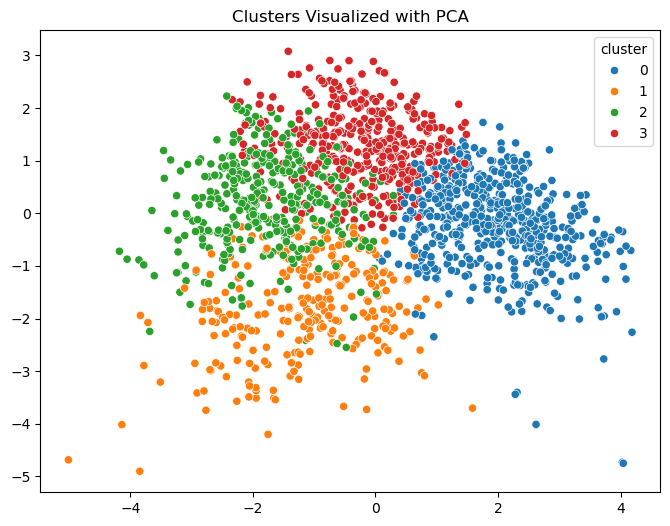

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='tab10')
plt.title("Clusters Visualized with PCA")
plt.show()


In [20]:
cluster_summary = df.groupby('cluster')[features].mean()
cluster_summary


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,popularity
cluster,,,,,,,,,,,
0,0.187251,0.354924,0.925397,0.154376,0.841976,-5.470609,0.109492,138.458308,0.435791,307456.870849,16.892989
1,0.516562,0.452025,0.571595,0.075423,0.329610,-9.007996,0.046693,109.832935,0.393235,274845.422939,25.548387
2,0.213205,0.588812,0.664043,0.180633,0.235165,-9.901168,0.047998,122.729883,0.749935,187070.684783,15.111413
3,0.188110,0.521846,0.879523,0.221201,0.372523,-4.993751,0.051971,123.847230,0.749166,244157.332542,27.610451


In [21]:
for c in cluster_summary.index:
    print(f"\n----- Cluster {c} Characteristics -----")
    display(cluster_summary.loc[c].sort_values(ascending=False).head(5))



----- Cluster 0 Characteristics -----


duration_ms    307456.870849
tempo             138.458308
popularity         16.892989
energy              0.925397
liveness            0.841976
Name: 0, dtype: float64


----- Cluster 1 Characteristics -----


duration_ms     274845.422939
tempo              109.832935
popularity          25.548387
energy               0.571595
acousticness         0.516562
Name: 1, dtype: float64


----- Cluster 2 Characteristics -----


duration_ms    187070.684783
tempo             122.729883
popularity         15.111413
valence             0.749935
energy              0.664043
Name: 2, dtype: float64


----- Cluster 3 Characteristics -----


duration_ms    244157.332542
tempo             123.847230
popularity         27.610451
energy              0.879523
valence             0.749166
Name: 3, dtype: float64